In [22]:
# Initial imports
import numpy as np
import random
import os
import requests
import pandas as pd
from dotenv import load_dotenv
#from MCForecastTools import MCSimulation
import datetime
%matplotlib inline
import yfinance as yf
from pathlib import Path
import panel as pn
pn.extension('plotly')
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [23]:
#function to extract stock data from yahoo finance
def yahoo_finance(ticker_lst):
    port_df = yf.download(ticker, start='2000-01-01', end='2019-12-31',interval = '1mo')
    port_df.sort_values(by='Date', ascending=False)
    return port_df

In [24]:
# There are 2 tables on the Wikipedia page
# we want the first table
filepath = os.path.join("..\Data", "sp500.csv")
#load sp500 data from the csv file
dataload=pd.read_csv(Path(filepath),infer_datetime_format=True, parse_dates=True, encoding='cp1252')
#drop any NaN values
dataload.dropna(inplace=True)  
dataload

,id,ticker,name,date_added_first
0,0,MMM,3M,1976-08-09
1,1,ABT,Abbott Laboratories,1964-03-31
2,2,ABBV,AbbVie,2012-12-31
3,3,ABMD,Abiomed,2018-05-31
4,4,ACN,Accenture,2011-07-06
...,...,...,...,...
498,500,YUM,Yum! Brands,1997-10-06
499,501,ZBRA,Zebra Technologies,2019-12-23
500,502,ZBH,Zimmer Biomet,2001-08-07
501,503,ZION,Zions Bancorp,2001-06-22


In [25]:
#Drop all columns except Symbol and Date_first_added
dataload.drop(['id', 'name'], axis = 1, inplace = True)
dataload.rename(columns={"date_added_first":"Date_first_added"}, inplace = True)
#reset the index
dataload = dataload.reset_index()
dataload.drop(['index'], axis=1, inplace=True)

In [26]:
#df.columns
earliest_list_date = pd.to_datetime('1901-01-01')
latest_list_date = pd.to_datetime('2000-01-01')

dataload.Date_first_added = dataload.Date_first_added.str[0:10]

added_after_1995 = dataload[pd.to_datetime(dataload['Date_first_added']) >= earliest_list_date ]
added_b4_2000 = added_after_1995[pd.to_datetime(dataload['Date_first_added']) < latest_list_date]
added_b4_2000.reset_index(inplace=True)
added_b4_2000.sort_values(by='Date_first_added',inplace =True)
added_b4_2000.shape

(161, 3)

In [27]:
added_b4_2000 = added_b4_2000.drop(['index'], axis =1)
added_b4_2000


,ticker,Date_first_added
80,HSY,1957-03-04
97,KR,1957-03-04
32,BMY,1957-03-04
65,ETR,1957-03-04
96,KMB,1957-03-04
...,...,...
152,VMC,1999-06-30
13,ADI,1999-10-12
98,LEG,1999-10-14
159,XLNX,1999-11-08


### in our testing randint gets lot of repeat tickers in the dataset so instead we are using sample() function

#for i in range (0, urange):
    #stock = added_b4_2000.iloc[random.randint(0, urange)].ticker
    #stock_port.append(stock)
#print(stock_port)


In [28]:
#create a list of stock symbols that have been added to SP500 before 2000
stock_port = []
port_df = pd.DataFrame()
  
#set the number of random stocks to be picked if the user chooses to pick 10 stock portfolio
#to be used in future customization
on_click_10 = 10
#set the number of random stocks to be picked if the user chooses to pick 20 stock portfolio
#to be used in future customization
on_click_20 = 20
#set the number of random stocks to be picked if the user chooses to pick 30 stock portfolio
#to be used in future customization
on_click_30 = 30

#picking random stock tickers using sample() function instead of random.rand.int
random_df=added_b4_2000.sample(n=on_click_20)
ticker_list = []
for i in range(on_click_20):
    ticker = random_df.iloc[i].ticker                    
    ticker_list.append(ticker)
#print(test_list)
ticker = ""
ticker = ' '.join(ticker_list)
print(ticker)


AZO EMR LLY MRO AMAT TJX PHM PNC K CAG ECL KO ALL KR LEG CTXS LMT PPG SO CVX


In [29]:
#calling the yfinance function to fetch data for the random list of tickers from sp500 dataset
port_df = yahoo_finance(ticker)

[*********************100%***********************]  20 of 20 completed


In [30]:
port_df.to_csv(r'.\test.csv', sep=',', encoding='utf-8', header='true') 
port_df.dropna(inplace=True)
#port_df['Adj Close'].head(4)

In [31]:
data = port_df['Adj Close']
type(data)#.head(1)
#try to find mean for each row
data['monthly_avg'] = data.sum(axis=1)/on_click_20
data.head(3)

,ALL,AMAT,AZO,CAG,CTXS,CVX,ECL,EMR,K,KO,...,LEG,LLY,LMT,MRO,PHM,PNC,PPG,SO,TJX,monthly_avg
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,13.715990,25.813194,26.25,8.000933,52.634888,18.871914,13.650973,14.821631,12.489897,15.865982,...,8.340585,34.640327,10.736814,4.575673,3.681220,25.422722,15.985350,5.642295,1.598617,15.972044
2000-02-01,11.645656,34.405830,24.00,6.168866,80.869804,16.854967,10.959574,12.264441,13.037134,13.431701,...,7.790332,30.787811,10.120177,3.852026,3.549277,20.717138,14.334197,4.873514,1.561867,16.349300
2000-03-01,14.201006,35.452000,27.75,6.828134,50.813274,21.037102,14.232895,14.407836,13.409712,12.965566,...,10.023805,32.574810,11.861279,4.685250,4.406907,24.130953,15.302901,4.841815,2.178800,16.393912


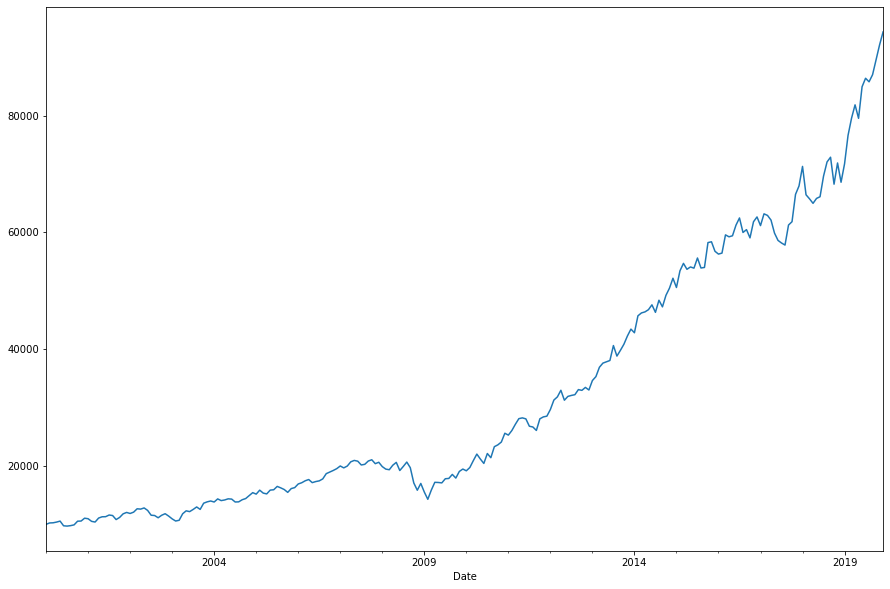

In [53]:
#Value of $10000 invested 
initial_val =  data.iloc[0,20]
num_of_shares = 10000 / initial_val
#calculate the monthly value of stock portfolio
data['monthly_value'] = num_of_shares * data.iloc[:,20] 
rand_plot = data['monthly_value'].plot(figsize= (15,10))
#data

In [54]:
def get_fund_data(ticker):   
    #ticker = ""
    #ticker = ' '.join(mg_list)
    #print(ticker)
    mg_fund_df = yahoo_finance(ticker)
    mg_fund_df.dropna(inplace=True)
    return mg_fund_df[['Adj Close','Close']]

In [55]:
monthly_values = pd.DataFrame()
mg_list = ['FLCSX', 'PRCOX', 'HAIAX', 'DFUSX','VPMCX','PRBLX','DGAGX','TISCX','VDIGX','DFELX','MRGAX','BRLIX']
for ticker in mg_list:
    data = get_fund_data(ticker)
    fund_data = data[['Adj Close','Close']]
    initial_value = fund_data.iloc[0,0]
    num_of_shares = 10000 / initial_val
    monthly_values[ticker] = num_of_shares * fund_data.iloc[:,0]
monthly_values   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FLCSX,PRCOX,HAIAX,DFUSX,VPMCX,PRBLX,DGAGX,TISCX,VDIGX,DFELX,MRGAX,BRLIX
Date,,,,,,,,,,,,
2000-01-01,7105.391398,5184.204513,6198.830095,4533.295826,14532.968819,4397.680931,6341.083136,3985.280325,4415.754239,3086.142938,5281.833456,2383.576588
2000-02-01,7530.965892,5156.462531,6184.458743,4450.191687,16768.629120,4405.241281,5994.562124,3884.904470,4223.506281,3038.481148,5102.355456,2355.665928
2000-03-01,7653.529899,5700.889523,6845.541540,4874.019395,17326.953375,4760.690276,6476.000332,4286.407293,4392.094560,3303.007114,5631.178105,2584.533846
2000-04-01,7255.192249,5510.167128,6572.485252,4732.445843,17252.504647,4774.228987,6539.656662,4163.726256,4478.381784,3198.149802,5502.978765,2534.294718
2000-05-01,6962.398563,5367.991113,6409.611718,4636.717137,16428.104083,4853.830001,6612.762535,4100.526699,4585.520875,3124.273385,5490.158055,2408.696301
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,17191.974081,17236.764169,19631.619333,13310.453916,69858.535607,25904.338085,17854.384208,11496.492997,17506.598561,7176.661816,19633.721089,6874.361866
2019-09-01,17665.880599,17531.199851,19977.954052,13510.348802,70821.474119,25986.074890,18007.875671,11737.473626,17535.458294,7298.930861,19887.837691,7025.295993
2019-10-01,18339.627071,17936.049361,20293.906459,13853.569102,73662.426946,26116.744389,18394.696655,11966.698753,17437.334960,7466.662316,20160.110598,7176.230121


<AxesSubplot:xlabel='Date'>

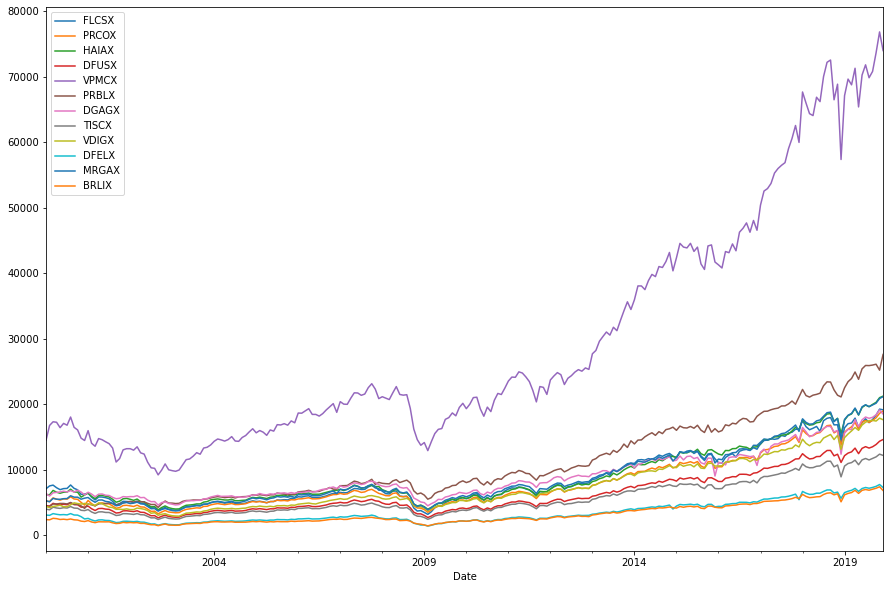

In [58]:
monthly_values.plot(figsize= (15,10))   